# Project 2: FBI Gun Data Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

    For this project I chose to analzye data from the FBI's National Instant Criminal Background Check System
    (from census.gov). 
                                                                                                                                   This dataset's purpose is to show gun shop owners whether a potential buyer has a criminal record. 
    The system helps preventing criminals from accessing guns too easily.
    In the following steps I will present how I cleaned, wrangled and analyzed the data and finally, 
    I will draw conclusions.
    
    One important factor to consider when analyzing this data is that these statistics show the number of firearm background checks initiated through the NICS system and they only represent the number of firearms that have been officially sold. A lot of firearms could also be obtained through trades and from the black market.

### In this project I will try to support the following theory:
    Poverty and low income leads to a higher amount of background checks which is associated with a higher amount of firearm purchases.

First, I import the packages that I want to use and then I upload the datasets into the workspace.


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


For this project there are two different datasets available:

    "gun_data.xlsx" which I renamed to "gun.xlsx"
    and "U.S. Census Data.csv" which I renamed to "census.csv"

The NICS data (gun.csv) is provided in an .xlsx file and contains the number of firearm checks by month, state, and type.

The U.S. census data is provided in a .csv file and contains several variables at the state level. 
Most variables just have one data point per state (2016), but a few have data for more than one year.

<a id='wrangling'></a>
## Data Wrangling


First, I convert the .xslx file to a .csv file. I used https://www.zamzar.com to do that.

In [91]:
gun = pd.read_csv('gun.csv')
census = pd.read_csv('census.csv')

     I load my data and print out a few lines to get an overview of the first dataframe:


In [92]:
gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,1378.0,1262.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,200.0,154.0,2.0,28.0,30.0,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,1474.0,748.0,3.0,82.0,5.0,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,1296.0,1824.0,4.0,0.0,0.0,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,535.0,397.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [93]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

        It has 12485 rows and 27 columns.
        Some categories have a lot of missing values.

      I print out a few lines to get an overview of the second dataframe:


In [94]:
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,5.00%,7.40%,-0.20%,2.30%,2.90%,1.90%,2.20%,3.30%,0.20%,4.20%,4.00%,0.40%,4.10%,0.70%,1.70%,5.40%,4.40%,8.90%,1.40%,1.70%,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653","1,360,301","1,567,582","12,830,632","6,483,802","3,046,355","2,853,118","4,339,367","4,533,372","1,328,361","5,773,552","6,547,629","9,883,640","5,303,925","2,967,297","5,988,927","989,415","1,826,341","2,700,551","1,316,470","8,791,894",2059179,19378102,9535483,672591,11536504,3751351,3831074,12702379,1052567,4625364,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,6.40%,6.80%,6.00%,6.40%,6.40%,6.70%,6.20%,6.60%,4.90%,6.10%,5.30%,5.80%,6.40%,6.30%,6.10%,6.00%,7.00%,6.30%,4.80%,5.80%,0.062,0.059,0.06,0.073,0.06,0.068,0.058,0.056,0.052,0.059,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [95]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

    It has 85 rows and 52 columns.
    The columns 'Fact Note' is mostly empty, inconsistent and can probably be dropped.

    One problem that becomes clear when looking at the files is that one dataframe provides the area names in rows and the  other one in columns. This will be resolved later with the transpose function.

Checking the "Fact Note" column in census dataframe for null values:

In [96]:
census['Fact Note'].isnull().sum()

57

Dropping the "Fact Note" function since it is incomplete and not useful:

In [97]:
census =census.drop('Fact Note',axis=1)

Checking if it worked:

In [98]:
census.head(3)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,5.00%,7.40%,-0.20%,2.30%,2.90%,1.90%,2.20%,3.30%,0.20%,4.20%,4.00%,0.40%,4.10%,0.70%,1.70%,5.40%,4.40%,8.90%,1.40%,1.70%,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%


# Data Cleaning

Checking whether both files contain the same amount of states.


In [99]:
index_census = census.iloc[0].index
index_census

Index(['Fact', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], dtype='object')

"Fact" column needs to be exluded from this process:

In [100]:
index_census = index_census[1:]
index_census

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], dtype='object')

Now I am checking the length of this array to see how many states it contains.

In [101]:
len(index_census)

50

and the same for the gun.csv file

In [102]:
index_gun = gun.groupby('state').sum().index
index_gun

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'], dtype='object', name='state')

In [103]:
len(index_gun)

55

Checking which states from the gun file are present in the census file.

In [104]:
for s in index_gun:
    if s not in index_census:
        print(s)

District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands


These 5 states columns should later be dropped for this analysis, because we do not have enough data for them.

Now I will prepare the census dataframe. At the moment it looks like this:


In [105]:
census.head(3)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371","1,428,557","1,683,140","12,801,539","6,633,053","3,134,693","2,907,289","4,436,974","4,681,666","1,331,479","6,016,447","6,811,779","9,928,300","5,519,952","2,988,726","6,093,000","1,042,520","1,907,116","2,940,058","1,334,795","8,944,469",2081015,19745289,10146788,757952,11614373,3923561,4093465,12784227,1056426,4961119,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680","1,360,301","1,567,650","12,831,574","6,484,136","3,046,869","2,853,129","4,339,344","4,533,479","1,328,364","5,773,786","6,547,813","9,884,129","5,303,924","2,968,103","5,988,928","989,414","1,826,334","2,700,691","1,316,461","8,791,953",2059198,19378110,9535688,672591,11536727,3751615,3831072,12702857,1052940,4625410,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,5.00%,7.40%,-0.20%,2.30%,2.90%,1.90%,2.20%,3.30%,0.20%,4.20%,4.00%,0.40%,4.10%,0.70%,1.70%,5.40%,4.40%,8.90%,1.40%,1.70%,0.011,0.019,0.064,0.127,0.007,0.046,0.068,0.006,0.003,0.073,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%


The information should be sorted by state displayed in rows not columns to match the gun dataframe, so I need to transpose the dataframes to align the files formatting.

In [106]:
census_tra = census.T

Checking whether it worked:

In [107]:
census_tra.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July...","American Indian and Alaska Native alone, perce...","Asian alone, percent, July 1, 2016, (V2016)",Native Hawaiian and Other Pacific Islander alo...,"Two or More Races, percent, July 1, 2016, (V2...","Hispanic or Latino, percent, July 1, 2016, (V...","White alone, not Hispanic or Latino, percent, ...","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, ...",Median selected monthly owner costs -with a mo...,Median selected monthly owner costs -without a...,"Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of pe...","Language other than English spoken at home, pe...","High school graduate or higher, percent of per...","Bachelor's degree or higher, percent of person...","With a disability, under age 65 years, percent...","Persons without health insurance, under age 6...","In civilian labor force, total, percent of pop...","In civilian labor force, female, percent of po...","Total accommodation and food services sales, 2...",Total health care and social assistance receip...,"Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers ag...","Median household income (in 2015 dollars), 201...",Per capita income in past 12 months (in 2015 d...,"Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,NaN,NOTE: FIPS Code values are enclosed in quotes ...,NaN,Value Notes,1,NaN,Fact Notes,(a),(b),(c),NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"363,170",3.50%,"2,230,185","2,171,853",68.70%,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,85.30%,5.20%,84.30%,23.50%,11.80%,10.70%,58.00%,53.00%,"7,576,462","26,039,632","124,809,759","57,746,565","58,564,965","$12,145",24.4,"$43,623","$24,091",17.10%,"98,540","1,634,391","67,370,353",1.90%,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,47.70%,48.00%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"69,323",7.40%,"310,658","306,967",63.40%,"$250,000","$1,827",$554,"$1,

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which US state has the highest amount of NICS background checks?

To obtain this information, I will extract the total number of background checks for each state and then visualize them.

In [108]:
gun_state = gun.groupby('state')

Calculating the mean of the totals rows per state, because there is an inconsistent number of entries per year.

In [109]:
gun_state_mean = gun_state.mean()

In [110]:
gun_state_totals = gun_state_mean['totals']

In [111]:
gun_state_totals.head()

state
Alabama       29542.198238
Alaska         5011.643172
Arizona       19496.537445
Arkansas      16531.422907
California    83762.392070
Name: totals, dtype: float64

Dropping the states that only appear in one dataset

In [112]:
gun_state_totals = gun_state_totals.drop([
'District of Columbia',
'Guam',
'Mariana Islands',
'Puerto Rico',
'Virgin Islands'])

Checking whether the lines have been dropped. Since 'Guam' is not in there, it worked.

In [113]:
gun_state_totals.head(15)

state
Alabama        29542.198238
Alaska          5011.643172
Arizona        19496.537445
Arkansas       16531.422907
California     83762.392070
Colorado       26689.348018
Connecticut    13956.502203
Delaware        2164.621145
Florida        51523.246696
Georgia        31761.859031
Hawaii           870.396476
Idaho           8670.193833
Illinois       68156.537445
Indiana        34084.458150
Iowa           10119.629956
Name: totals, dtype: float64

In [114]:
gun_state_totals_sorted = gun_state_totals.sort_values(axis=0, ascending=False, kind='quicksort', na_position='last')

In [169]:
gun_state_totals.head(5)

state
Alabama       29542.198238
Alaska         5011.643172
Arizona       19496.537445
Arkansas      16531.422907
California    83762.392070
Name: totals, dtype: float64

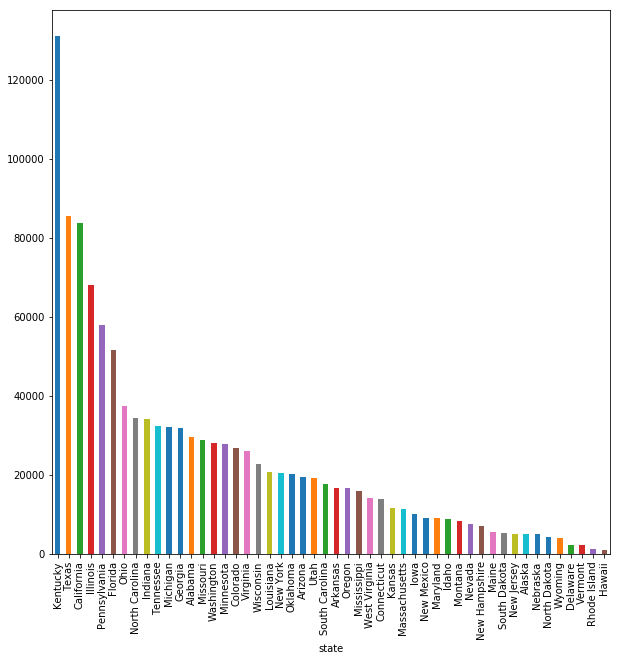

In [116]:
gun_state_totals_sorted.plot(x="state", y="totals", kind="bar", figsize=(10,10));

 This bar chart demonstrates how a mean of the total number of firearm background checks through NICS per state is distributed.
     
    -Kentucky
    -Texas
    -California 
are among the states with the highest background check figures.

    -Hawaii
    -Rhode Island
    -Vermont 
are among the states with the lowest background checks figures.
To get the guns per capita, the population per state from the census file would have been considered.
Let's keep the states with the highest and lowest in mind for later.

### Research Question 2 : Is a higher percentage of persons in poverty associated with a higher number of background checks?
        

For this question I will prepare the data from the census file and plot the "percentage of persons in poverty" per US state. Then I will check if the poverty rate is higher in countries which report a higher amount of background checks.

First, I display a head of all the columns in the census file to find the index of the percentage of persons in poverty.

In [117]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

census_tra.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July...","American Indian and Alaska Native alone, perce...","Asian alone, percent, July 1, 2016, (V2016)",Native Hawaiian and Other Pacific Islander alo...,"Two or More Races, percent, July 1, 2016, (V2...","Hispanic or Latino, percent, July 1, 2016, (V...","White alone, not Hispanic or Latino, percent, ...","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, ...",Median selected monthly owner costs -with a mo...,Median selected monthly owner costs -without a...,"Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of pe...","Language other than English spoken at home, pe...","High school graduate or higher, percent of per...","Bachelor's degree or higher, percent of person...","With a disability, under age 65 years, percent...","Persons without health insurance, under age 6...","In civilian labor force, total, percent of pop...","In civilian labor force, female, percent of po...","Total accommodation and food services sales, 2...",Total health care and social assistance receip...,"Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers ag...","Median household income (in 2015 dollars), 201...",Per capita income in past 12 months (in 2015 d...,"Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,NaN,NOTE: FIPS Code values are enclosed in quotes ...,NaN,Value Notes,1,NaN,Fact Notes,(a),(b),(c),NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"363,170",3.50%,"2,230,185","2,171,853",68.70%,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,85.30%,5.20%,84.30%,23.50%,11.80%,10.70%,58.00%,53.00%,"7,576,462","26,039,632","124,809,759","57,746,565","58,564,965","$12,145",24.4,"$43,623","$24,091",17.10%,"98,540","1,634,391","67,370,353",1.90%,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,47.70%,48.00%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"69,323",7.40%,"310,658","306,967",63.40%,"$250,000","$1,827",$554,"$1,

I slice the dataframe and take out the columns that I need.

In [118]:
census_poverty = census_tra.iloc[:,[49]]

In [119]:
census_poverty.head(10)

,49
Fact,"Persons in poverty, percent"
Alabama,17.10%
Alaska,9.90%
Arizona,16.40%
Arkansas,17.20%
California,14.30%
Colorado,11.00%
Connecticut,9.80%
Delaware,11.70%
Florida,14.70%


Renaming the column index.

In [120]:
census_poverty = census_poverty.rename({'Persons in poverty, percent': [0,1]})
census_poverty.columns = ['poverty']

In [121]:
census_poverty.head(10)

,poverty
Fact,"Persons in poverty, percent"
Alabama,17.10%
Alaska,9.90%
Arizona,16.40%
Arkansas,17.20%
California,14.30%
Colorado,11.00%
Connecticut,9.80%
Delaware,11.70%
Florida,14.70%


Dropping the 'Fact' row.

In [122]:
census_poverty = census_poverty.drop(["Fact"])

In [123]:
census_poverty.head(10)

,poverty
Alabama,17.10%
Alaska,9.90%
Arizona,16.40%
Arkansas,17.20%
California,14.30%
Colorado,11.00%
Connecticut,9.80%
Delaware,11.70%
Florida,14.70%
Georgia,16.00%


Renaming the index of the first column.

In [124]:
census_poverty = census_poverty.rename_axis('states', axis=1)

In [125]:
census_poverty.head()

states,poverty
Alabama,17.10%
Alaska,9.90%
Arizona,16.40%
Arkansas,17.20%
California,14.30%


Transforming the column content into string type to facilitate the work.

In [126]:
census_poverty["poverty"].astype(str)

Alabama           17.10%
Alaska             9.90%
Arizona           16.40%
Arkansas          17.20%
California        14.30%
Colorado          11.00%
Connecticut        9.80%
Delaware          11.70%
Florida           14.70%
Georgia           16.00%
Hawaii             9.30%
Idaho             14.40%
Illinois          13.00%
Indiana           14.10%
Iowa              11.80%
Kansas            12.10%
Kentucky          18.50%
Louisiana         20.20%
Maine             12.50%
Maryland           9.70%
Massachusetts     10.40%
Michigan          15.00%
Minnesota          9.90%
Mississippi       20.80%
Missouri          14.00%
Montana           13.30%
Nebraska          11.40%
Nevada            13.80%
New Hampshire      7.30%
New Jersey        10.40%
New Mexico         0.198
New York           0.147
North Carolina     0.154
North Dakota       0.107
Ohio               0.146
Oklahoma           0.163
Oregon             0.133
Pennsylvania       0.129
Rhode Island       0.128
South Carolina     0.153


If we display all rows of the dataframe (with .head(50)), we can see that not all values in the column 'poverty' are in the same format. Some are in percentage and some in percentage points.
Building a for loop to transform all of them into percentage points in float type and stripping the '%' symbol.

In [127]:


my_list = np.array(census_poverty["poverty"].astype(str))

for i in range(len(my_list)):
    item = my_list[i]
    isper = item[-1:]
    if isper == '%':
        item = item[:-1]
        my_list[i] = float(item)/100
    else:
        my_list[i] = float(item)

my_list

array([0.171, 0.099, 0.16399999999999998, 0.172, 0.14300000000000002, 0.11,
       0.098, 0.11699999999999999, 0.147, 0.16, 0.09300000000000001,
       0.14400000000000002, 0.13, 0.141, 0.11800000000000001, 0.121, 0.185,
       0.20199999999999999, 0.125, 0.09699999999999999,
       0.10400000000000001, 0.15, 0.099, 0.20800000000000002, 0.14, 0.133,
       0.114, 0.138, 0.073, 0.10400000000000001, 0.198, 0.147, 0.154,
       0.107, 0.146, 0.163, 0.133, 0.129, 0.128, 0.153, 0.133, 0.158,
       0.156, 0.102, 0.11900000000000001, 0.11, 0.113, 0.179,
       0.11800000000000001, 0.113], dtype=object)

Checking if it worked.

In [128]:
poverty_corrected =  pd.DataFrame(my_list)

poverty_corrected

,0
0,0.171
1,0.099
2,0.164
3,0.172
4,0.143
5,0.11
6,0.098
7,0.117
8,0.147
9,0.16


Displaying the whole dataframe.

In [129]:
census_poverty['poverty'] = my_list

census_poverty

states,poverty
Alabama,0.171
Alaska,0.099
Arizona,0.164
Arkansas,0.172
California,0.143
Colorado,0.11
Connecticut,0.098
Delaware,0.117
Florida,0.147
Georgia,0.16


The state names are currently indexes of rows and not a regular column with content. Turning the state names into a regular column.

In [130]:
census_poverty.reset_index(level=census_poverty.index.names, inplace=True)

In [131]:
census_poverty.head()

states,index,poverty
0,Alabama,0.171
1,Alaska,0.099
2,Arizona,0.164
3,Arkansas,0.172
4,California,0.143


Renaming the new column structure indexes.

In [132]:
plot_poverty = census_poverty.rename({'states':[0,0], 'index': [0,1]})
plot_poverty.columns = ['states', 'poverty']

In [133]:
plot_poverty.head()

,states,poverty
0,Alabama,0.171
1,Alaska,0.099
2,Arizona,0.164
3,Arkansas,0.172
4,California,0.143


The state names are now a regular column and can be plotted.

Sorting the dataframe rows from highest rate of poverty to lowest.

In [134]:
plot_poverty_sorted = plot_poverty.sort_values(by = ['poverty'], axis=0, ascending=False, kind='quicksort', na_position='last')

plot_poverty_sorted

,states,poverty
23,Mississippi,0.208
17,Louisiana,0.202
30,New Mexico,0.198
16,Kentucky,0.185
47,West Virginia,0.179
3,Arkansas,0.172
0,Alabama,0.171
2,Arizona,0.164
35,Oklahoma,0.163
9,Georgia,0.16


Plotting the dataframe.

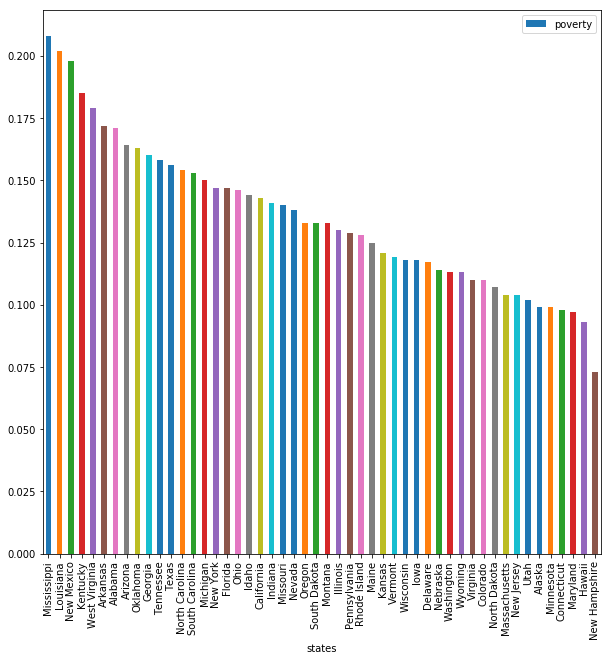

In [135]:
plot_poverty_sorted.plot(x="states", y="poverty", kind="bar", figsize=(10,10));

plt.show()

#### Interpreting the results:

    We remember that the following US states have the highest mean of background checks:
        -Kentucky
        -Texas
        -California 
    and these ones have the lowest mean of background checks.
        -Hawaii
        -Rhode Island
        -Vermont 

Kentucky and Texas are among the states with the highest percentage of persons in poverty, while California is ranking closer to the average.

Hawaii has the second lowest percentage of persons living in poverty, while also reporting the lowest number of background checks. Rhode Island and Vermont are closer to Hawaii regarding percentage of persons living in poverty, as well as number of background checks.

Overall, all states which reported the highest amount of background checks also report a higher percentage of persons in poverty, while all states which reported the lowest amount of background checks report a lower percentage of persons in poverty.

### Research Question 3 : Is a low income per capita related to a high number of firearm background checks?

To support the previous theory, I will show that the same is true for income per capita. 
I suppose that a high percentage of persons in poverty is also linked to a low income per capita.
A lot of the steps are similar to the ones in the previous research question, so I will not comment every single step.

In [136]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

census_tra.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010","Female persons, percent, July 1, 2016, (V2016)","Female persons, percent, April 1, 2010","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July...","American Indian and Alaska Native alone, perce...","Asian alone, percent, July 1, 2016, (V2016)",Native Hawaiian and Other Pacific Islander alo...,"Two or More Races, percent, July 1, 2016, (V2...","Hispanic or Latino, percent, July 1, 2016, (V...","White alone, not Hispanic or Latino, percent, ...","Veterans, 2011-2015","Foreign born persons, percent, 2011-2015","Housing units, July 1, 2016, (V2016)","Housing units, April 1, 2010","Owner-occupied housing unit rate, 2011-2015","Median value of owner-occupied housing units, ...",Median selected monthly owner costs -with a mo...,Median selected monthly owner costs -without a...,"Median gross rent, 2011-2015","Building permits, 2016","Households, 2011-2015","Persons per household, 2011-2015","Living in same house 1 year ago, percent of pe...","Language other than English spoken at home, pe...","High school graduate or higher, percent of per...","Bachelor's degree or higher, percent of person...","With a disability, under age 65 years, percent...","Persons without health insurance, under age 6...","In civilian labor force, total, percent of pop...","In civilian labor force, female, percent of po...","Total accommodation and food services sales, 2...",Total health care and social assistance receip...,"Total manufacturers shipments, 2012 ($1,000)","Total merchant wholesaler sales, 2012 ($1,000)","Total retail sales, 2012 ($1,000)","Total retail sales per capita, 2012","Mean travel time to work (minutes), workers ag...","Median household income (in 2015 dollars), 201...",Per capita income in past 12 months (in 2015 d...,"Persons in poverty, percent","Total employer establishments, 2015","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Total employment, percent change, 2014-2015","Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code,NaN,NOTE: FIPS Code values are enclosed in quotes ...,NaN,Value Notes,1,NaN,Fact Notes,(a),(b),(c),NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,51.60%,51.50%,69.30%,26.80%,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,"363,170",3.50%,"2,230,185","2,171,853",68.70%,"$125,500","$1,139",$345,$717,"15,001","1,848,325",2.55,85.30%,5.20%,84.30%,23.50%,11.80%,10.70%,58.00%,53.00%,"7,576,462","26,039,632","124,809,759","57,746,565","58,564,965","$12,145",24.4,"$43,623","$24,091",17.10%,"98,540","1,634,391","67,370,353",1.90%,"322,025","374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,47.70%,48.00%,66.10%,3.80%,15.20%,6.30%,1.30%,7.30%,7.00%,61.20%,"69,323",7.40%,"310,658","306,967",63.40%,"$250,000","$1,827",$554,"$1,

I take out the columns that I need + all rows.

In [137]:
census_income = census_tra.iloc[:,[48]]

In [138]:
census_income.head(10)

,48
Fact,Per capita income in past 12 months (in 2015 d...
Alabama,"$24,091"
Alaska,"$33,413"
Arizona,"$25,848"
Arkansas,"$22,798"
California,"$30,318"
Colorado,"$32,217"
Connecticut,"$38,803"
Delaware,"$30,554"
Florida,"$26,829"


In [139]:
census_income = census_income.rename({'Per capita income in past 12 months (in 2015 dollars)': [0,1]})
census_income.columns = ['income']

In [140]:
census_income.head()

,income
Fact,Per capita income in past 12 months (in 2015 d...
Alabama,"$24,091"
Alaska,"$33,413"
Arizona,"$25,848"
Arkansas,"$22,798"


In [141]:
census_income = census_income.drop(["Fact"])

In [142]:
census_income.head()

,income
Alabama,"$24,091"
Alaska,"$33,413"
Arizona,"$25,848"
Arkansas,"$22,798"
California,"$30,318"


When I looked at the whole set of numbers I noticed that some numbers have commas and some do not, so I am deleting all commas and the dollar sign.

In [143]:
census_income['income'] = census_income['income'].str.replace(',', '')

In [144]:
census_income['income'] = census_income['income'].str.replace('$', '')

In [145]:
census_income.head(5)

,income
Alabama,24091
Alaska,33413
Arizona,25848
Arkansas,22798
California,30318


In [146]:
census_income.reset_index(level=census_income.index.names, inplace=True)

In [147]:
census_income = census_income.rename({'index': [0,1], 'income': [0,1]})
census_income.columns = ['states','income']


In [148]:
census_income.head(5)

,states,income
0,Alabama,24091
1,Alaska,33413
2,Arizona,25848
3,Arkansas,22798
4,California,30318


In [164]:
census_income_sorted = census_income.sort_values(by = ['income'], axis=0, ascending=False, kind='quicksort', na_position='last')

In [165]:
census_income_sorted.head(5)

,states,income
6,Connecticut,38803
19,Maryland,36897
20,Massachusetts,36895
29,New Jersey,36582
28,New Hampshire,34362


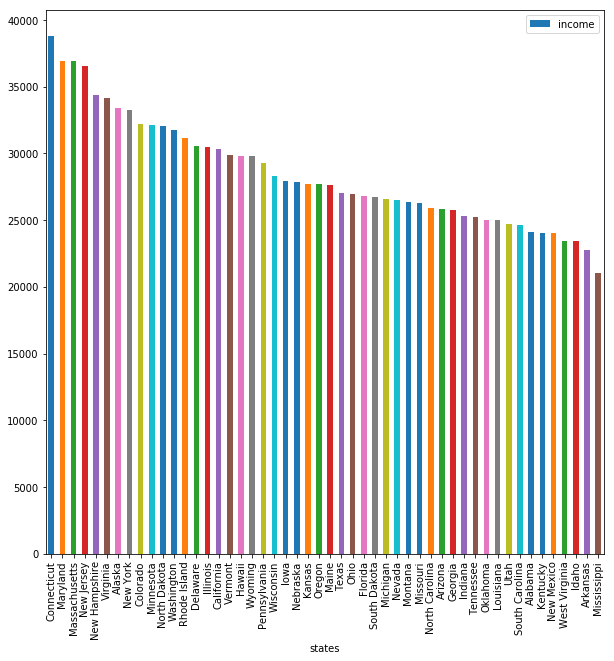

In [166]:
census_income_sorted['income'] = census_income_sorted['income'].astype(int)

census_income_sorted.plot(x="states", y="income", kind="bar", figsize=(10,10));

plt.show()

As we can see, Kentucky is among the states with the lowest income per capita, while Texas and California rank somewhere in the middle.
Hawaii, Rhode Island and Vermont all range in the upper half of the income per capita which supports our theory of a connection between low amount of background checks and prosperous areas in the US.

## Research Question 3 : Visualizing the most significant outcomes in pie charts

In [185]:
gun_state_totals.head(5)

state
Alabama       29542.198238
Alaska         5011.643172
Arizona       19496.537445
Arkansas      16531.422907
California    83762.392070
Name: totals, dtype: float64

#### 3a) We remember that these are the three states with the highest and lowest number of background checks. 

    highest
        Kentucky          131112044053
        Texas              85617559471
        California         83762392070
    lowest
        Hawaii               870396476
        RhodeIsland        1272555066
        Vermont             2134127753

#### Now we will visualize these numbers in a pie chart.

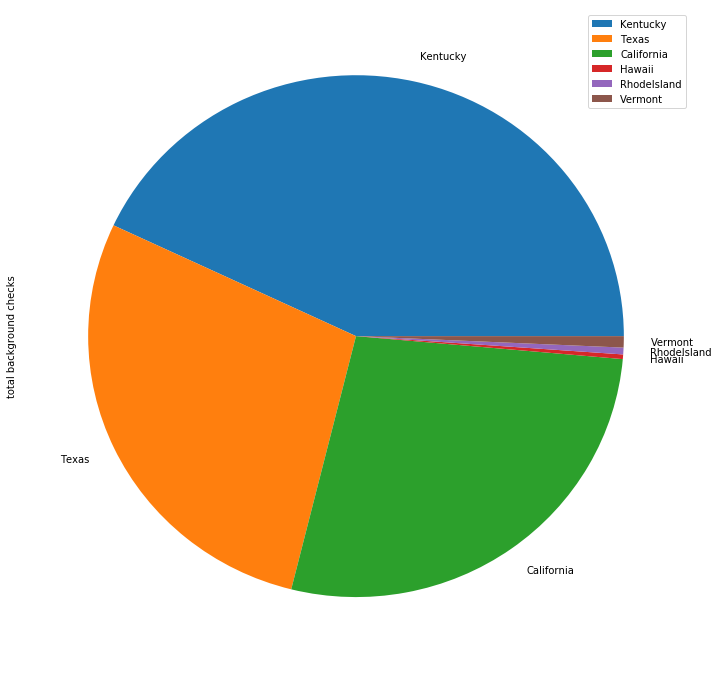

In [187]:
pie_background_checks= pd.DataFrame({'total background checks': 
                                      [131112044053, 
                                       85617559471, 
                                       83762392070, 
                                       870396476, 
                                       1272555066, 
                                       2134127753]}
                                     ,index=
                                     ['Kentucky',
                                      'Texas',
                                      'California',
                                      'Hawaii',
                                      'RhodeIsland',
                                      'Vermont'])


pie_background_checks.plot.pie(y='total background checks', figsize=(12, 12))
plt.show()

#### The pie chart shows the differences in amount of total firearm background checks between the top 3 and flop 3 states very clearly.

In [196]:
plot_poverty_sorted.head(5)

,states,poverty
23,Mississippi,0.208
17,Louisiana,0.202
30,New Mexico,0.198
16,Kentucky,0.185
47,West Virginia,0.179


#### 3b) Now we are going to visualize the percentage of persons living in poverty in the beforementioned states with highest and lowest amount of firearm background checks.

highest
    Kentucky       0.185
    Texas          0.156
    California     0.143
lowest
    Hawaii         0.093
    RhodeIsland    0.128
    Vermont        0.119
    
#### Now we will visualize these numbers in a pie chart.

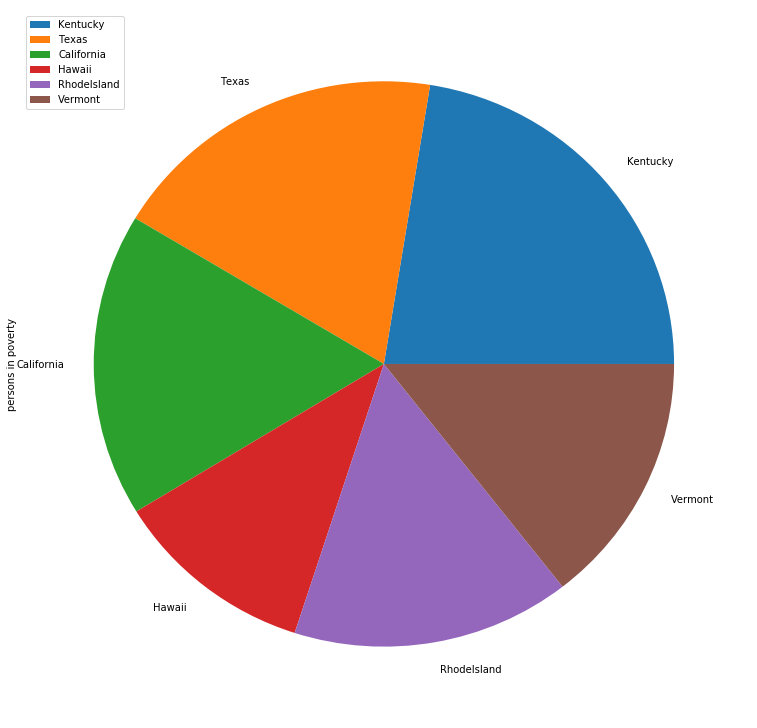

In [195]:
pie_poverty= pd.DataFrame({'persons in poverty': 
                                      [185, 
                                       156, 
                                       143, 
                                       93, 
                                       128, 
                                       119]}
                                     ,index=
                                     ['Kentucky',
                                      'Texas',
                                      'California',
                                      'Hawaii',
                                      'RhodeIsland',
                                      'Vermont'])


pie_poverty.plot.pie(y='persons in poverty', figsize=(13, 13))
plt.show()

The pie chart shows that a connection between a high number of firearm background checks and a high percentage of persons living in poverty exists. However, the visualization also shows that the correlation between those two values is not as strong as expected and as it seemed from interpreting the bar charts. 

Please provide your reflections about the limitations that you have encountered or that you think are present in your analysis. For instance, you can reflect on the following questions:

is the data provided by the dataset sufficient to answer your question?
is the size of the dataset is sufficient to give a good judgement about the questions you asked?
What are the major difficulties you encountered in the dataset while performing the analysis

## Final interpretation of the results and encountered limitations

#### The cleaning, wrangling, sorting and plotting of the data has shown that 
-Kentucky
-Texas
-California 
are among the states with the highest NICS background check figures, while 
-Hawaii
-Rhode Island
-Vermont 
are among the states with the lowest background checks figures.

There seems to be a correlation between the amount of NICS firearm background checks and the percentage of persons living in poverty. The validity of the data has been checked by investigating the correlation between background checks and the amount of the per capita income throughout the 12 months of the year 2015. The higher the percentage of persons in poverty and the lower the income, the higher the amount of firearm background checks.
However, when visualizing the results in a pie chart, the correlation between poverty and checks does not seem as striking as assumed.

Overall, there seems to be enough evidence to support the data. Though it could be varying due to other factors and due to limitations of the provided dataset. One of the limitations is the inconsistency of the data. For some states, results have been published more regularly than for others. Some columns provide information without an indication of the represented time period. Another factor that needs to be taken into account is that the number of background checks does not represent the number of actual fireram purchases. Furthermore, firearms are probably being traded and exchanged illegally, as well.

One of the difficulties when working on this project was the fact that there were two separate datasets provided with very different formatting and inconsistent information. In addition, numerical values were somewhat messy and the provided inconsistent time periods made it difficult to handle the data at this point of the project, since a lot of the information has not been provided in any of the tutorials. However, it is beneficial to deal with messy data, as this could very well happen in a real life situation. Another difficulty of this project was, personally, trying to form hypotheses without imposing subjective ideas on the reader/process. Some investigations could be regarded as racist (investigating ethinicity in relation to gun violence) or insensitive. This can be a dilemma when forming hypotheses early on in the analysis. However, in the end it should be the data that 'speaks' and proves hypotheses.

In [63]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0